In [6]:
import numpy as np
import pandas as pd
import pickle

import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
from cfg_global import project_folder_path
from spike_train_utils import get_lv
from spike_train_utils import simulate_hawkes_thinning
os.chdir(current_wd)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
fig_folder = project_folder_path + 'results\\synthetic\\fig_drafts_paper\\'

In [64]:
save_fig = True

In [ ]:
rate_hz     = [5, 10]
tau_ms      = 100
alpha       = 0.4 
duration_ms = 10*1000    

# generate
num_trials = 2
all_spike_trains = []
for trial in range(num_trials):
    spikes = simulate_hawkes_thinning(
        fr_hz_=rate_hz[trial],
        tau_ms_=tau_ms,
        alpha_=alpha,
        duration_ms_=duration_ms,
        seed_=5  # different seed per trial
    )
    print(f'fr {len(spikes)/10}')
    all_spike_trains.append(spikes)

In [ ]:
rate_hz     = 5
tau_ms      = [100,200]
alpha       = 0.4
duration_ms = 10*1000    

# generate
num_trials = 2
all_spike_trains_taus = []
for trial in range(num_trials):
    spikes = simulate_hawkes_thinning(
        fr_hz_=rate_hz,
        tau_ms_=tau_ms[trial],
        alpha_=alpha,
        duration_ms_=duration_ms,
        seed_=5  # different seed per trial
    )
    print(f'fr {len(spikes)/10}')
    all_spike_trains_taus.append(spikes)

In [ ]:
rate_hz     = 5
tau_ms      = 100
alpha       = [0.4, 0.8] 
duration_ms = 10*1000    

# generate
num_trials = 2
all_spike_trains_alpha = []
for trial in range(num_trials):
    spikes = simulate_hawkes_thinning(
        fr_hz_=rate_hz,
        tau_ms_=tau_ms,
        alpha_=alpha[trial],
        duration_ms_=duration_ms,
        seed_=5  # different seed per trial
    )
    print(f'fr {len(spikes)/10}')
    all_spike_trains_alpha.append(spikes)

### Plots

#### Raster plots of spike trains

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(6, 8))

axes[0].plot(all_spike_trains[0], np.ones(len(all_spike_trains[0]))*0.1, '|', markersize=10, alpha=0.9)
axes[0].plot(all_spike_trains[1], np.zeros(len(all_spike_trains[1])), '|', markersize=10, alpha=1)

axes[1].plot(all_spike_trains_taus[0], np.ones(len(all_spike_trains_taus[0]))*0.1, '|', markersize=10, alpha=0.9)
axes[1].plot(all_spike_trains_taus[1], np.zeros(len(all_spike_trains_taus[1])), '|', markersize=10, alpha=1)

axes[2].plot(all_spike_trains_alpha[0], np.ones(len(all_spike_trains_alpha[0]))*0.1, '|', markersize=10, alpha=0.9)
axes[2].plot(all_spike_trains_alpha[1], np.zeros(len(all_spike_trains_alpha[1])), '|', markersize=10, alpha=1)

for ax in axes.flat:
    ax.set_ylim([-0.1, 0.2])
    ax.set_xlim([0, 10000])
    
sns.despine()

In [ ]:
def smoothed_rate(spike_times, T_ms=10000, dt_ms=1, sigma_ms=100):
    # 1) bin into dt_ms-wide bins
    edges = np.arange(0, T_ms + dt_ms, dt_ms)
    counts, _ = np.histogram(spike_times, bins=edges)

    # 2) smooth with a Gaussian (sigma in number of bins)
    sigma_bins = sigma_ms / dt_ms
    smooth_counts = gaussian_filter1d(counts.astype(float), sigma=sigma_bins)

    # 3) convert to Hz: (spikes per bin) / (bin_width in s)
    dt_s = dt_ms / 1000.0
    rate_hz = smooth_counts / dt_s

    # 4) bin‐centers for plotting
    t = edges[:-1] + dt_ms/2
    return t, rate_hz

fig, axes = plt.subplots(3,1, figsize=(6, 8))

for ax, trains in zip(axes,
                      [all_spike_trains,
                       all_spike_trains_taus,
                       all_spike_trains_alpha]):
    # ---- raster ----
    ax.plot(trains[0], np.ones(len(trains[0]))*0.15,  '|', ms=10, alpha=0.8)
    ax.plot(trains[1], np.ones(len(trains[1]))*0.1,         '|', ms=10, alpha=1.0)
    ax.set_ylim([-0.1, 0.2])
    ax.set_xlim([0, 10000])
    ax.set_ylabel('Spike')

    # ---- smoothed rate ----
    t0, r0 = smoothed_rate(trains[0])
    t1, r1 = smoothed_rate(trains[1])
    ax_rate = ax.twinx()
    ax_rate.plot(t0, r0, color='C0', alpha=0.6, label='Train 1 (Hz)')
    ax_rate.plot(t1, r1, color='C1', alpha=0.6, label='Train 2 (Hz)')
    ax_rate.set_ylim([0, 50])
    ax_rate.set_ylabel('Instantaneous rate (Hz)')

for ax in axes.flat:
   # ax.set_ylim([-0.1, 0.2])
    ax.set_xlim([7000, 9000])
    ax.set_xticks(np.linspace(7000, 9000, 5))
    ax.set_xticklabels(np.linspace(0, 2, 5))

sns.despine()
plt.tight_layout()

if save_fig:
    plt.savefig(fig_folder + 'data_gen_params_examples_7000_9000.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'data_gen_params_examples_7000_9000.svg' , bbox_inches='tight')

In [ ]:
palette = sns.color_palette('Blues', n_colors=100)

fig, ax = plt.subplots(figsize=(8, 1))
ax.imshow([palette], aspect='auto')
ax.set_axis_off()  # Hide axes for a cleaner look
plt.show()

fig.savefig(fig_folder + 'blues_palette.svg', bbox_inches='tight')
fig.savefig(fig_folder + 'blues_palette.png', bbox_inches='tight')

#### Schematic for making trials

In [ ]:
rate_hz     = 5
tau_ms      = 100
alpha       = 0.4 
duration_ms = 30*1000    

# generate
num_trials = 3
all_spike_trains = []
for trial in range(num_trials):
    spikes = simulate_hawkes_thinning(
        fr_hz_=rate_hz,
        tau_ms_=tau_ms,
        alpha_=alpha,
        duration_ms_=duration_ms,
        seed_=trial  # different seed per trial
    )
    print(f'fr {len(spikes)/30}')
    all_spike_trains.append(spikes)

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(20, 3))

axes.plot(all_spike_trains[0], np.ones(len(all_spike_trains[0]))*0.1, '|', markersize=10, alpha=1)
axes.plot(all_spike_trains[1], np.ones(len(all_spike_trains[1]))*0.15, '|', markersize=10, alpha=1)
axes.plot(all_spike_trains[2], np.ones(len(all_spike_trains[2]))*0.2, '|', markersize=10, alpha=1)

axes.set_ylim([0.05, 0.25])
#axes.set_xlim([0, 10000])
axes.set_xlim([0, 30000])
axes.set_xticks(np.linspace(0, 30000, 31))
axes.set_xticklabels(np.linspace(0, 30, 31))

sns.despine()

if save_fig:
    plt.savefig(fig_folder + 'data_gen_spike_trains_30sec.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'data_gen_spike_trains_30sec.svg' , bbox_inches='tight')

### Lv examples

In [46]:
rate_hz     = 5
tau_ms      = 100
alpha       = [0.001, 0.7]
duration_ms = 10*1000    

# generate
num_trials = 2
all_spike_trains = []
for trial in range(num_trials):
    spikes = simulate_hawkes_thinning(
        fr_hz_=rate_hz,
        tau_ms_=tau_ms,
        alpha_=alpha[trial],
        duration_ms_=duration_ms,
        seed_=trial  # different seed per trial
    )
    print(f'fr {len(spikes)/10}')
    all_spike_trains.append(spikes)

fr 4.4
fr 3.7


In [47]:
# Generate a regular spike train with jitter
def generate_regular_spike_train_jitter(duration_ms, firing_rate_hz, jitter_std_ms, randomize_phase=False, seed=None):
    rng = np.random.default_rng(seed)
    isi = 1000.0 / firing_rate_hz
    offset = rng.uniform(0, isi) if randomize_phase else 0.0

    # Ideal periodic spike times
    ideal_spikes = np.arange(offset, duration_ms, isi)

    # Add Gaussian jitter
    jitter = rng.normal(0, jitter_std_ms, size=ideal_spikes.shape)
    jittered_spikes = ideal_spikes + jitter

    # Keep only spikes within the window
    valid_spikes = jittered_spikes[(jittered_spikes >= 0) & (jittered_spikes < duration_ms)]
    valid_spikes.sort()
    return valid_spikes

duration_ms    = 10 * 1000
firing_rate_hz = 5.0
jitter_std_ms  = 100 
spike_times = generate_regular_spike_train_jitter(
    duration_ms, firing_rate_hz, jitter_std_ms, randomize_phase=False, seed=42
)
print("Jittered spike times (ms):", spike_times)


Jittered spike times (ms): [  30.47170798   96.00158938  475.04511958  604.89648113  694.05647164
  869.78204931 1212.78404032 1368.37574077 1598.31988425 1714.69560724
 2087.93979749 2277.77919354 2406.60306976 2712.7241207  2846.75093423
 2914.07075371 3236.87507841 3304.11173992 3687.84503013 3795.0074089
 3981.51376365 4131.90704556 4522.25413387 4584.54705179 4757.16721778
 4964.78664495 5253.23091856 5436.54440644 5641.27326116 5843.0821003
 6159.35849836 6214.16476009 6348.77572709 6518.62272718 6861.59794226
 7112.89722927 7188.60525423 7315.9843523  7517.55187843 7865.05927878
 8074.32541712 8254.31542683 8333.44902927 8623.21613231 8811.66858091
 9021.86885967 9287.14287779 9422.35955488 9667.89135631 9806.75790695]


In [50]:
all_spike_trains.append(spike_times)

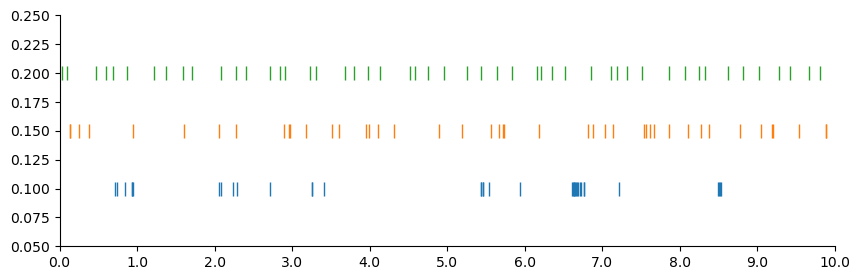

In [58]:
fig, axes = plt.subplots(1,1, figsize=(10, 3))

axes.plot(all_spike_trains[1], np.ones(len(all_spike_trains[1]))*0.1, '|', markersize=10, alpha=1)
axes.plot(all_spike_trains[0], np.ones(len(all_spike_trains[0]))*0.15, '|', markersize=10, alpha=1)
axes.plot(all_spike_trains[2], np.ones(len(all_spike_trains[2]))*0.2, '|', markersize=10, alpha=1)

axes.set_ylim([0.05, 0.25])
#axes.set_xlim([0, 10000])
axes.set_xlim([0, 10000])
axes.set_xticks(np.linspace(0, 10000, 11))
axes.set_xticklabels(np.linspace(0, 10, 11))

sns.despine()

In [56]:
lv_l = []
for spike_train in all_spike_trains:
    spike_train_int = np.asarray([int(spike) for spike in spike_train])
    lv = get_lv(spike_train_int, False)
    lv_l.append(lv)
print(lv_l)

[np.float64(0.9271465501837485), np.float64(1.4473434975840989), np.float64(0.4433487280726255)]


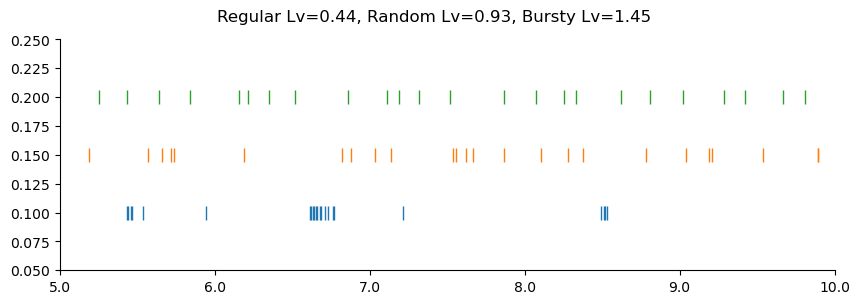

In [65]:
fig, axes = plt.subplots(1,1, figsize=(10, 3))

axes.plot(all_spike_trains[1], np.ones(len(all_spike_trains[1]))*0.1, '|', markersize=10, alpha=1, label='bursty')
axes.plot(all_spike_trains[0], np.ones(len(all_spike_trains[0]))*0.15, '|', markersize=10, alpha=1, label='random')
axes.plot(all_spike_trains[2], np.ones(len(all_spike_trains[2]))*0.2, '|', markersize=10, alpha=1, label='regular')

axes.set_ylim([0.05, 0.25])
#axes.set_xlim([0, 10000])
axes.set_xlim([5000, 10000])
axes.set_xticks(np.linspace(5000, 10000, 6))
axes.set_xticklabels(np.linspace(5, 10, 6))

fig.suptitle(f'Regular Lv={np.round(lv_l[2], 2)}, Random Lv={np.round(lv_l[0], 2)}, Bursty Lv={np.round(lv_l[1], 2)}')

sns.despine()

if save_fig:
    plt.savefig(fig_folder + 'data_gen_spike_trains_lv_5sec.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'data_gen_spike_trains_lv_5sec.svg' , bbox_inches='tight')